## Calculating Basic Statistics of the Dataset

In [1]:
import pandas as pd
import os

In [3]:
# training_path = "training_data_16_October_release/EN/raw-documents"

dataset_path = "../dataset/train_dev_en/"

# List all txt files in the directory
txt_files = [f for f in os.listdir(dataset_path)]

# Read the content of each file and store it in a list
data = []
for file_name in txt_files:
    with open(os.path.join(dataset_path, file_name), 'r') as file:
        text = file.read()
        data.append({'file_name': file_name, 'content': text})

# Create a DataFrame
df = pd.DataFrame(data, columns=['file_name', 'content'])
print(df)

            file_name                                            content
0    EN_UA_104876.txt  Putin honours army unit blamed for Bucha massa...
1    EN_UA_023211.txt  Europe Putin thanks US journalist Tucker Carls...
2    EN_UA_011260.txt  Russia has a clear plan to resolve the conflic...
3    EN_UA_101067.txt  First war of TikTok era sees tragedy, humor an...
4    EN_UA_102963.txt  Ukraine's President Zelenskyy to address Mexic...
..                ...                                                ...
222  EN_CC_100076.txt  Reuters Joins BBC in Failed ‘Fact Check’ of Da...
223  EN_UA_103251.txt  Russia-Ukraine war map: Where are Russian troo...
224  EN_UA_002991.txt  Russian On-air Protester Fined, Faces Possible...
225  EN_UA_008072.txt  Putin Mobilizes More Troops, Hints at Nuclear ...
226  EN_UA_015962.txt  Dramatic moment anti-Putin troops ‘INVADE Russ...

[227 rows x 2 columns]


In [4]:
import nltk
from nltk.tokenize import sent_tokenize
import string

# Calculate the average sentence length, word count, and vocabulary size for each document
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def calculate_sentence_length(text):
    sentences = sent_tokenize(text) 
    avg_sentence_length = sum(len(sentence.split(" ")) for sentence in sentences) / len(sentences)

    return avg_sentence_length

def calculate_word_count(text):
    # return len(word_tokenize(text))
    print(text.split(" "))
    word_count = len(text.split(" ")) 
    return word_count

def calculate_vocabulary_size(text):
    # remove punctuation and convert to lower case
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    word_count = text.split(" ")
    print(word_count)
    vocabulary_size = set(word_count)
    return len(vocabulary_size)

def remove_s_in_content(content):
    content = content.split(" ")
    print("content: ", content)
    temp = []
    for word in content:
        if "s" == word:
            word = word.replace("s", "")
        else:
            temp.append(word)
    print("temp: ", temp)

def remove_new_line(content):
    content = content.replace("\n", " ")
    return content.replace("\n\n", " ")

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package punkt_tab to /Users/arian/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
# Apply the function to each document
df["avg_sentence_length"] = df["content"].apply(calculate_sentence_length)
df['word_count'] = df['content'].apply(calculate_word_count)
df['vocabulary_size'] = df['content'].apply(calculate_vocabulary_size)
# df['content'] = df['content'].apply(remove_s_in_content)
df['content'] = df['content'].apply(remove_new_line)
df

['Putin', 'honours', 'army', 'unit', 'blamed', 'for', 'Bucha', 'massacre', 'with', 'award', 'for', '‘heroism', 'and', 'bravery’', '\n\n', 'VLADIMIR', 'Putin', 'has', 'honoured', 'an', 'army', 'unit', 'accused', 'of', 'war', 'crimes', 'and', 'genocide', 'in', 'the', 'Russian', 'town', 'of', 'Bucha,', 'reports', 'suggest.\n\nA', 'decree', 'signed', 'by', 'the', 'Russian', 'tyrant', 'gave', 'the', '64th', 'Motor', 'Rifle', 'Brigade', 'the', 'title', 'of', 'guards', '–', 'scandalously', 'praising', 'them', 'for', '"mass', 'heroism', 'and', 'valour,', 'tenacity', 'and', 'courage."\n\nEarlier', 'this', 'month,', 'the', 'Ukrainian', 'ministry', 'identified', 'the', 'unit', 'as', 'those', 'responsible', 'for', 'the', 'alleged', 'rape', 'and', 'murder', 'of', 'innocent', 'Ukrainians.\n\nThe', 'barbarous', 'pack,', 'headed', 'by', 'Lieutenant', 'Colonel', 'Azatbek', 'Omurbekov', '-', 'dubbed', 'the', '“Butcher', 'of', 'Bucha”', '-', 'left', 'a', 'trail', 'of', 'death', 'and', 'destruction', 'in'

file_name                                            content  \
0    EN_UA_104876.txt  Putin honours army unit blamed for Bucha massa...   
1    EN_UA_023211.txt  Europe Putin thanks US journalist Tucker Carls...   
2    EN_UA_011260.txt  Russia has a clear plan to resolve the conflic...   
3    EN_UA_101067.txt  First war of TikTok era sees tragedy, humor an...   
4    EN_UA_102963.txt  Ukraine's President Zelenskyy to address Mexic...   
..                ...                                                ...   
222  EN_CC_100076.txt  Reuters Joins BBC in Failed ‘Fact Check’ of Da...   
223  EN_UA_103251.txt  Russia-Ukraine war map: Where are Russian troo...   
224  EN_UA_002991.txt  Russian On-air Protester Fined, Faces Possible...   
225  EN_UA_008072.txt  Putin Mobilizes More Troops, Hints at Nuclear ...   
226  EN_UA_015962.txt  Dramatic moment anti-Putin troops ‘INVADE Russ...   

     avg_sentence_length  word_count  vocabulary_size  
0              26.500000         511              299  
1              22.250000         343              177  
2              20.333333         596              319  
3              21.969697         698              404  
4              21.411765         352              198  
..                   ...         ...              ...  
222            27.000000         295              177  
223            16.928571         449              242  
224            35.375000         277              178  
225            31.750000         371              232  
226            19.548387         579              296  

[227 rows x 5 columns]

In [6]:
average_length_all_docs = df['avg_sentence_length'].mean()
print("average sentence length in the dataset: ", average_length_all_docs)
average_length_word_count_all_docs = df['word_count'].mean()
print("average number of tokens in the dataset for each document ", average_length_word_count_all_docs)
average_length_vocabulary_size_all_docs = df['vocabulary_size'].mean()
print("average number of unique words in the dataset for each document: ", average_length_vocabulary_size_all_docs)

len(df['content'])

average sentence length in the dataset:  25.876903230123364
average number of tokens in the dataset for each document  499.25550660792953
average number of unique words in the dataset for each document:  271.8942731277533


227

In [7]:
len(df)

227

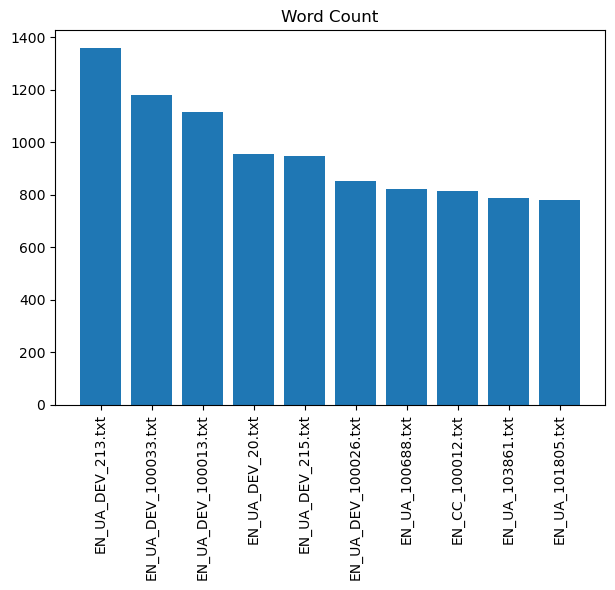

In [8]:
import matplotlib.pyplot as plt

# Sort the dataframe by the metrics in descending order
df_sorted_by_sentence_length = df.sort_values(by='avg_sentence_length', ascending=False)
df_sorted_by_word_count = df.sort_values(by='word_count', ascending=False)
df_sorted_by_vocabulary_size = df.sort_values(by='vocabulary_size', ascending=False)

# Plot the average sentence length, word count, and vocabulary size for each document
plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# plt.bar(df_sorted_by_sentence_length['file_name'][0:10], df_sorted_by_sentence_length['avg_sentence_length'][0:10])
# plt.title('Average Sentence Length')
# plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(df_sorted_by_word_count['file_name'][0:10], df_sorted_by_word_count['word_count'][0:10])
plt.title('Word Count')
plt.xticks(rotation=90)

# plt.subplot(1, 3, 3)
# plt.bar(df_sorted_by_vocabulary_size['file_name'][0:10], df_sorted_by_vocabulary_size['vocabulary_size'][0:10])
# plt.title('Vocabulary Size')
# plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [9]:
# from wordcloud import WordCloud

# # Create a word cloud for each document
# plt.figure(figsize=(12, 15))
# for i, row in df.iterrows():
#     sentences = sent_tokenize(row['content']) 
#     new_text = [word for sentence in sentences for word in sentence.split(" ")]
#     #remove apostroph
#     new_text = [word.replace("’s", "") for word in new_text]
#     new_text = " ".join(new_text)
#     print(new_text)
#     wordcloud = WordCloud(width=1200, height=600).generate(new_text)
#     plt.subplot(10, 5, i+1)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(row['file_name'])
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

In [11]:
!pip install wordcloud

227
Putin honours army unit blamed for Bucha massacre with award for ‘heroism and bravery’    VLADIMIR Putin has honoured an army unit accused of war crimes and genocide in the Russian town of Bucha, reports suggest. A decree signed by the Russian tyrant gave the 64th Motor Rifle Brigade the title of guards – scandalously praising them for "mass heroism and valour, tenacity and courage." Earlier this month, the Ukrainian ministry identified the unit as those responsible for the alleged rape and murder of innocent Ukrainians. The barbarous pack, headed by Lieutenant Colonel Azatbek Omurbekov - dubbed the “Butcher of Bucha” - left a trail of death and destruction in their wake. Harrowing pictures from the city, to the north-west of the capital Kyiv, showed the bodies of civilians scattered in the road and in shallow graves — many with bound hands and signs of torture. Some of them, from the wounds they had suffered, had been shot from close range. READ MORE ON UKRAINE  Heavily mutilated 

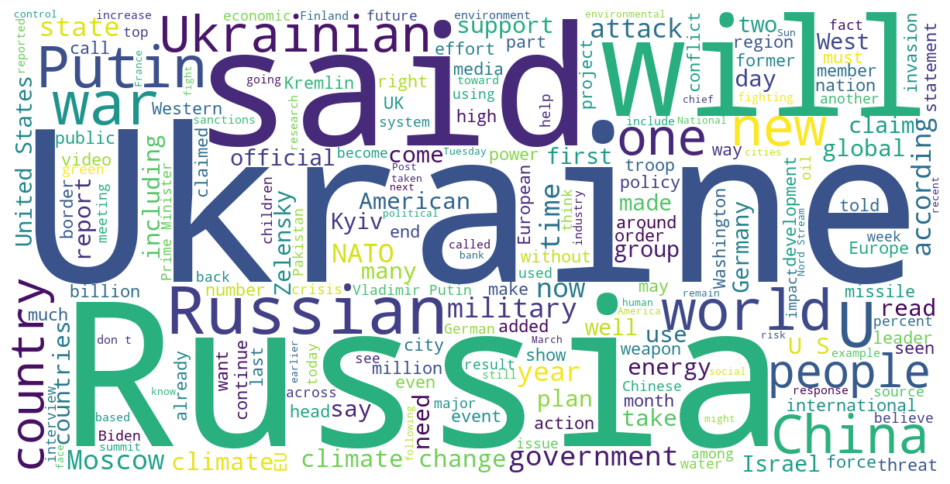

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

# Combine all content from the DataFrame into one string
combined_text = ""
print(len(df))
for _, row in df.iterrows():
    #print(row['content'])
    sentences = sent_tokenize(row['content']) 
    new_text = [word for sentence in sentences for word in sentence.split(" ")]
    # Remove apostrophes
    new_text = [word.replace("’s", "") for word in new_text]
    combined_text += " ".join(new_text) + " "

print(combined_text)
# Generate a single word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title("Word Cloud")
plt.show()


[nltk_data] Downloading package punkt to /Users/arian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


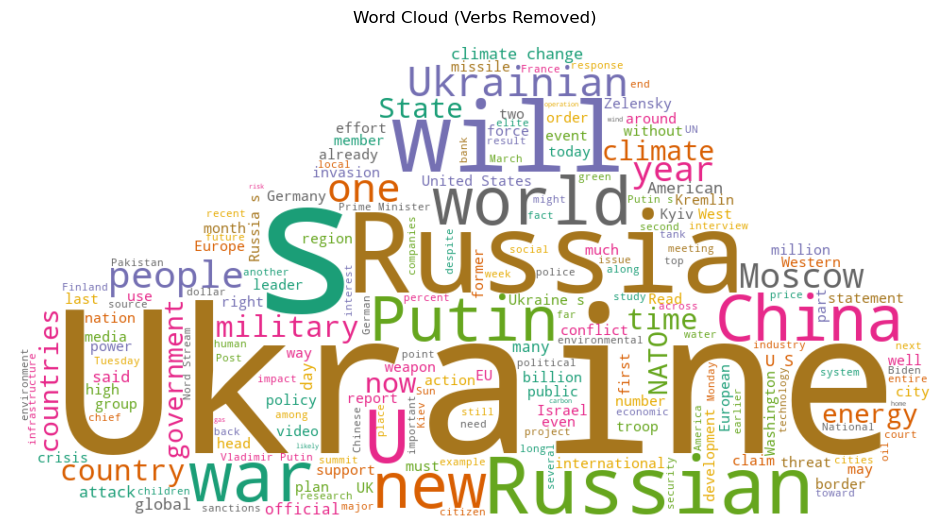

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk import pos_tag, word_tokenize
import nltk
from PIL import Image
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Combine text and remove verbs
combined_text = ""
for _, row in df.iterrows():
    sentences = sent_tokenize(row['content'])
    words = [word for sentence in sentences for word in sentence.split(" ")]
    
    # Part-of-speech tagging and filtering out verbs
    tagged_words = pos_tag(words)
    non_verb_words = [word for word, pos in tagged_words if not pos.startswith('V')]
    
    # Remove apostrophes and join
    non_verb_words = [word.replace("'s", "") for word in non_verb_words]
    combined_text += " ".join(non_verb_words) + " "


# Generate word cloud
light_bulb_mask = np.array(Image.open('cloud.png'))

# Generate word cloud with cloud mask
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      colormap='Dark2', 
                      mask=light_bulb_mask, 
                      contour_width=3, 
                      contour_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Verbs Removed)")
plt.show()

Putin honours army unit blamed for Bucha massacre with award for ‘heroism and bravery’    VLADIMIR Putin has honoured an army unit accused of war crimes and genocide in the Russian town of Bucha, reports suggest. A decree signed by the Russian tyrant gave the 64th Motor Rifle Brigade the title of guards – scandalously praising them for "mass heroism and valour, tenacity and courage." Earlier this month, the Ukrainian ministry identified the unit as those responsible for the alleged rape and murder of innocent Ukrainians. The barbarous pack, headed by Lieutenant Colonel Azatbek Omurbekov - dubbed the “Butcher of Bucha” - left a trail of death and destruction in their wake. Harrowing pictures from the city, to the north-west of the capital Kyiv, showed the bodies of civilians scattered in the road and in shallow graves — many with bound hands and signs of torture. Some of them, from the wounds they had suffered, had been shot from close range. READ MORE ON UKRAINE  Heavily mutilated corp

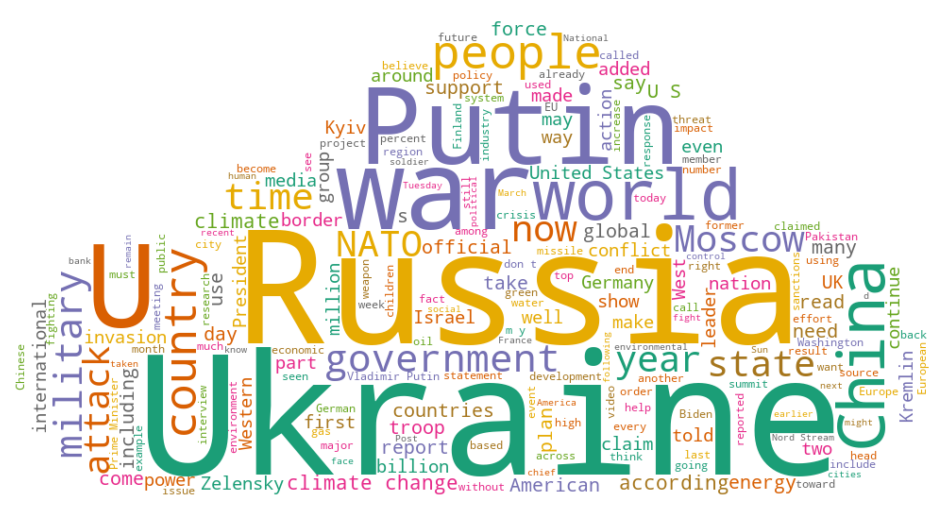

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from PIL import Image
import numpy as np

# Combine text as before
combined_text = ""
for _, row in df.iterrows():
    #print(row['content'])
    sentences = sent_tokenize(row['content']) 
    new_text = [word for sentence in sentences for word in sentence.split(" ")]
    # Remove apostrophes
    new_text = [word.replace("’s", "") for word in new_text]
    new_text = [word.replace(" u", "") for word in new_text]
    combined_text += " ".join(new_text) + " "

print(combined_text)

combined_text = combined_text.replace("said", " ")
combined_text = combined_text.replace("will", " ")
combined_text = combined_text.replace("one", " ")
combined_text = combined_text.replace("new", " ")
combined_text = combined_text.replace("russian", " ")
combined_text = combined_text.replace("Russian", " ")
combined_text = combined_text.replace("ukrainian", " ")
combined_text = combined_text.replace("Ukrainian", " ")

light_bulb_mask = np.array(Image.open('cloud.png'))

# Generate word cloud with the cloud mask
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      colormap='Dark2', 
                      mask=light_bulb_mask, 
                      contour_width=3, 
                      contour_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
dataset_path = "../dataset/train_dev_en/"

# List all txt files in the directory
txt_files = [f for f in os.listdir(dataset_path)]

# Read the content of each file and store it in a list
data = []
for file_name in txt_files:
    with open(os.path.join(dataset_path, file_name), 'r') as file:
        text = file.read()
        data.append({'file_name': file_name, 'content': text})

# Create a DataFrame
df_3 = pd.DataFrame(data, columns=['file_name', 'content'])
print(df_3)

            file_name                                            content
0    EN_UA_104876.txt  Putin honours army unit blamed for Bucha massa...
1    EN_UA_023211.txt  Europe Putin thanks US journalist Tucker Carls...
2    EN_UA_011260.txt  Russia has a clear plan to resolve the conflic...
3    EN_UA_101067.txt  First war of TikTok era sees tragedy, humor an...
4    EN_UA_102963.txt  Ukraine's President Zelenskyy to address Mexic...
..                ...                                                ...
222  EN_CC_100076.txt  Reuters Joins BBC in Failed ‘Fact Check’ of Da...
223  EN_UA_103251.txt  Russia-Ukraine war map: Where are Russian troo...
224  EN_UA_002991.txt  Russian On-air Protester Fined, Faces Possible...
225  EN_UA_008072.txt  Putin Mobilizes More Troops, Hints at Nuclear ...
226  EN_UA_015962.txt  Dramatic moment anti-Putin troops ‘INVADE Russ...

[227 rows x 2 columns]


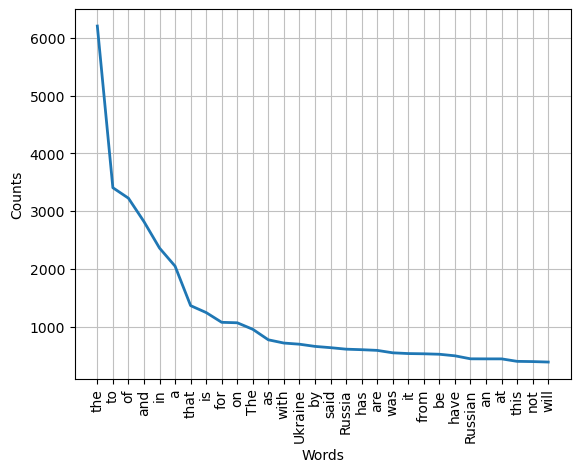

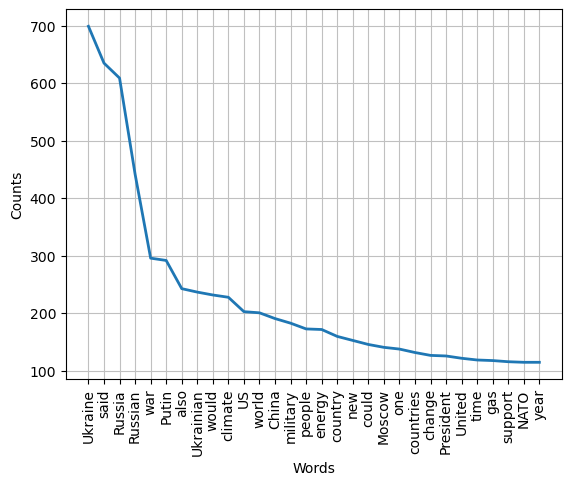

In [16]:
# create frequency distribution plot
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def plot_frequency_distribution(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word != "s"]
    fdist = FreqDist(words)
    return fdist

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Combine all content into one text
all_text = ' '.join(df_3['content'].tolist())

# Plot the frequency distribution for the combined text
fdist_all = plot_frequency_distribution(all_text)
fdist_all.plot(30, cumulative=False)
plt.xlabel('Words')
plt.show()

# Remove stop words from the combined text
all_text_no_stopwords = remove_stopwords(all_text)
fdist_all_no_stopwords = plot_frequency_distribution(all_text_no_stopwords)
fdist_all_no_stopwords.plot(30, cumulative=False)
plt.xlabel('Words')
plt.show()

In [ ]:
!pip install spacy

In [24]:
# You can also perform parts-of-speech (POS) tagging to look at the linguistic structure of your text.
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
import spacy
from spacy import displacy

# text = text_putin
text = "The head of Kyiv national security council said Putin could demand a tactical nuclear weapon be used if Russia army is beaten in Ukraine"
words = word_tokenize(text)
pos_tags = nltk.pos_tag(words)

nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Visualize the POS tags
displacy.render(doc, style="dep", jupyter=True)
print(pos_tags)

In [17]:
import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Process the sentence
doc = nlp(sentence)

# Visualize the POS tags and dependency structure
displacy.render(doc, style="dep", jupyter=True)

In [18]:
# print all the nouns and frequency in the df['content']

# def get_nouns(text):
#     words = text.split(" ")
#     words = [word for word in words if word.isalnum()]
#     fdist = FreqDist(words)
#     return fdist

# df_3['nouns'] = df_3['content'].apply(get_nouns)
# df_3

file_name                                            content  \
0    EN_UA_104876.txt  Putin honours army unit blamed for Bucha massa...   
1    EN_UA_023211.txt  Europe Putin thanks US journalist Tucker Carls...   
2    EN_UA_011260.txt  Russia has a clear plan to resolve the conflic...   
3    EN_UA_101067.txt  First war of TikTok era sees tragedy, humor an...   
4    EN_UA_102963.txt  Ukraine's President Zelenskyy to address Mexic...   
..                ...                                                ...   
222  EN_CC_100076.txt  Reuters Joins BBC in Failed ‘Fact Check’ of Da...   
223  EN_UA_103251.txt  Russia-Ukraine war map: Where are Russian troo...   
224  EN_UA_002991.txt  Russian On-air Protester Fined, Faces Possible...   
225  EN_UA_008072.txt  Putin Mobilizes More Troops, Hints at Nuclear ...   
226  EN_UA_015962.txt  Dramatic moment anti-Putin troops ‘INVADE Russ...   

                                                 nouns  
0    {'Putin': 2, 'honours': 1, 'army': 2, 'unit': ...  
1    {'Europe': 1, 'Putin': 8, 'thanks': 1, 'US': 3...  
2    {'Russia': 5, 'has': 3, 'a': 12, 'clear': 1, '...  
3    {'First': 1, 'war': 4, 'of': 26, 'TikTok': 12,...  
4    {'President': 2, 'Zelenskyy': 2, 'to': 23, 'ad...  
..                                                 ...  
222  {'Reuters': 2, 'Joins': 2, 'BBC': 2, 'in': 4, ...  
223  {'war': 2, 'Where': 1, 'are': 6, 'Russian': 15...  
224  {'Russian': 3, 'Protester': 1, 'Faces': 1, 'Po...  
225  {'Putin': 3, 'Mobilizes': 1, 'More': 1, 'Hints...  
226  {'Dramatic': 1, 'moment': 1, 'troops': 1, 'Rus...  

[227 rows x 3 columns]